In [4]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
#integrating seaborn with plt
sns.set()

#standardizing tools
from sklearn.preprocessing import StandardScaler
#clustering tools
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle 

In [5]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col=0)

In [6]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


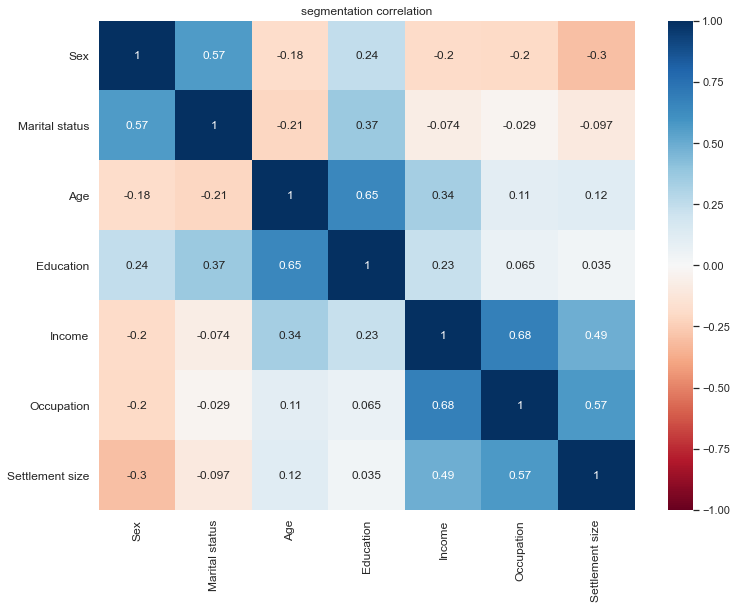

In [9]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), fontsize = 12, rotation = 0 )
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize = 12)
plt.title('segmentation correlation')
plt.show()

In [10]:
df_segmentation.Income

ID
100000001    124670
100000002    150773
100000003     89210
100000004    171565
100000005    149031
              ...  
100001996    123525
100001997    117744
100001998     86400
100001999     97968
100002000     68416
Name: Income, Length: 2000, dtype: int64

Text(0.5, 1.0, 'VISUALIZATION OF RAW DATA')

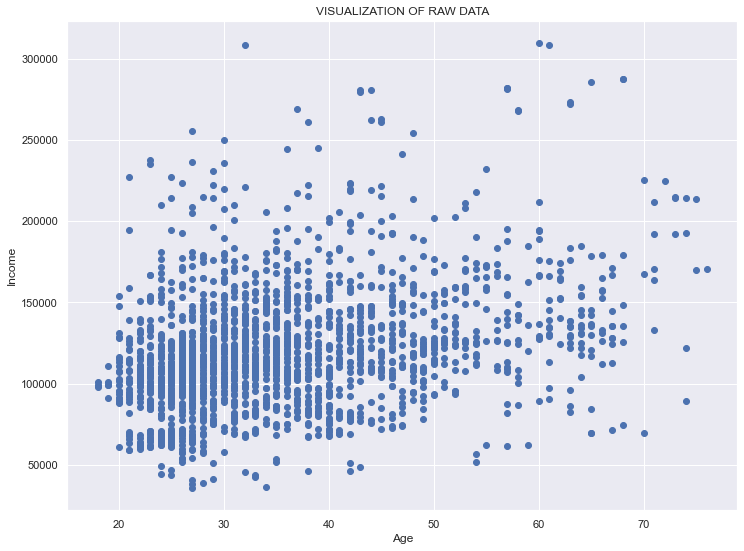

In [11]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.Age,df_segmentation.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('VISUALIZATION OF RAW DATA')

# STANDARDIZATION

In [1]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation) 
segmentation_std

NameError: name 'StandardScaler' is not defined

# HIERARCHICAL CLUSTERING

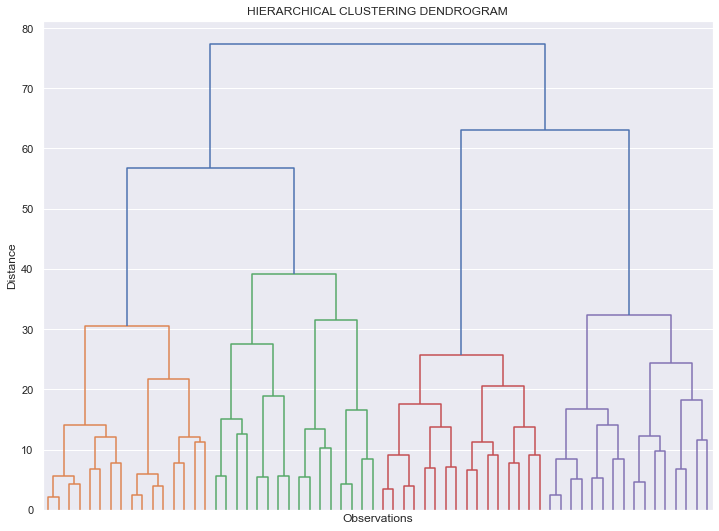

In [13]:
hier_clust = linkage(segmentation_std, method = 'ward')
plt.figure(figsize = (12,9))
plt.title('HIERARCHICAL CLUSTERING DENDROGRAM')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
          show_leaf_counts = False,
           truncate_mode = 'level',
           p = 5,
          no_labels = True,
          )

plt.show()

# K-MEANS CLUSTER

In [14]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

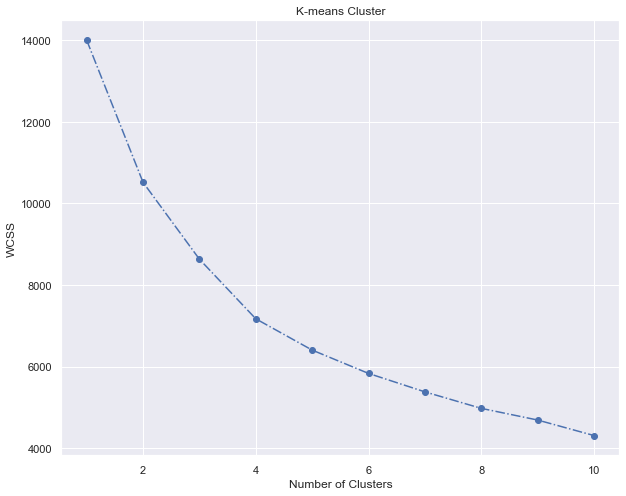

In [15]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Cluster')
plt.show()

In [16]:
kmeans.labels_

array([8, 3, 6, ..., 6, 1, 6])

In [17]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)


In [18]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

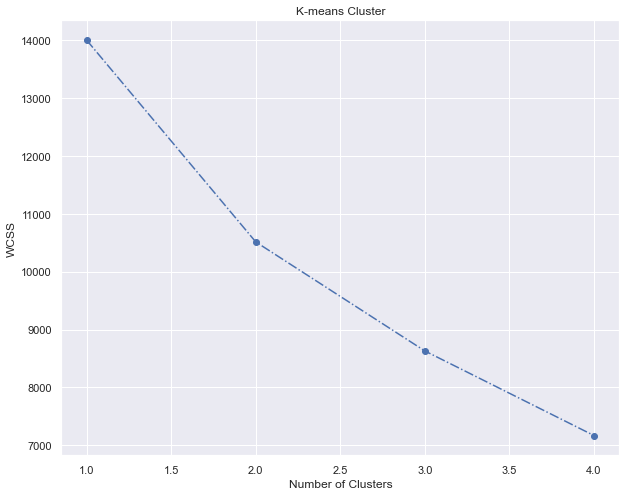

In [19]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), wcss[:4], marker = 'o', linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Cluster')
plt.show()

In [20]:
kmeans.labels_

array([0, 3, 1, ..., 1, 3, 1])

In [21]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means']= kmeans.labels_
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


In [22]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [23]:
df_segm_analysis['No of obs'] =df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prob of obs'] = df_segm_analysis['No of obs']/df_segm_analysis['No of obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No of obs,Prob of obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


### RENAMING THE GROUPS

In [24]:
df_segm_analysis.rename({0: 'Well off',
                        1: 'Fewer Opportunities',
                        2: 'Standard',
                        3: 'Career Focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No of obs,Prob of obs
Segment K-means,,,,,,,,,
Well off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Career Focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [25]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0: 'Well off',
                                                                  1: 'Fewer Opportunities',
                                                                  2: 'Standard',
                                                                  3: 'Career Focused'})

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


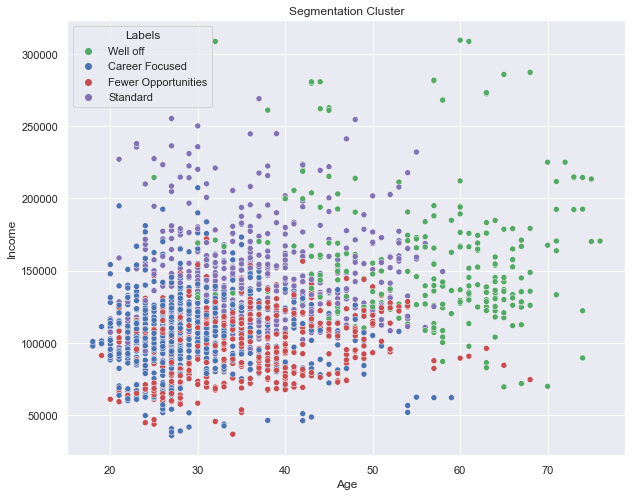

In [26]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g','b','r','m'])
plt.title('Segmentation Cluster')
plt.show()


# PCA

In [27]:
pca = PCA()


In [28]:
pca.fit(segmentation_std)

PCA()

In [29]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

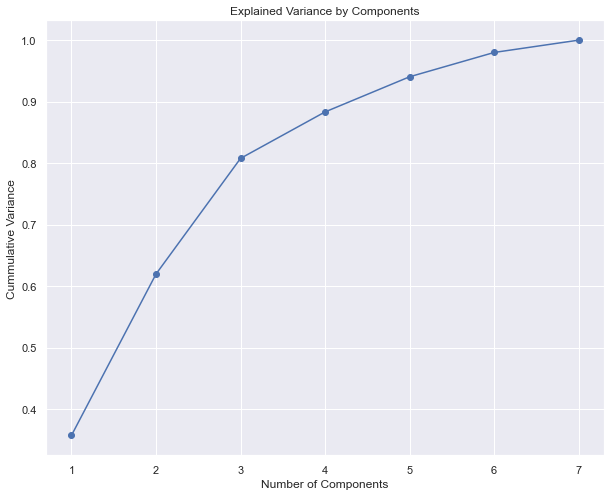

In [30]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = 'solid')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance')
plt.title('Explained Variance by Components')
plt.show()

In [31]:
pca = PCA(n_components = 3)

In [32]:
pca.fit(segmentation_std)

PCA(n_components=3)

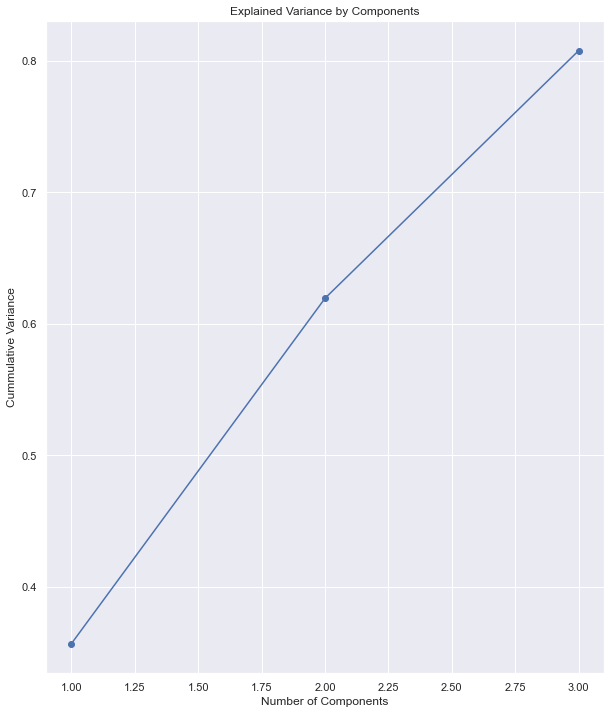

In [33]:
plt.figure(figsize = (10,12))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = 'solid')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance')
plt.title('Explained Variance by Components')
plt.show()

In [34]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [35]:
df_pca_comp = pd.DataFrame(pca.components_,
                            columns = df_segmentation.columns.values,
                            index = ['component 1','component 2','component 3'])

In [36]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Text(0.5, 1.0, 'Component correlation')

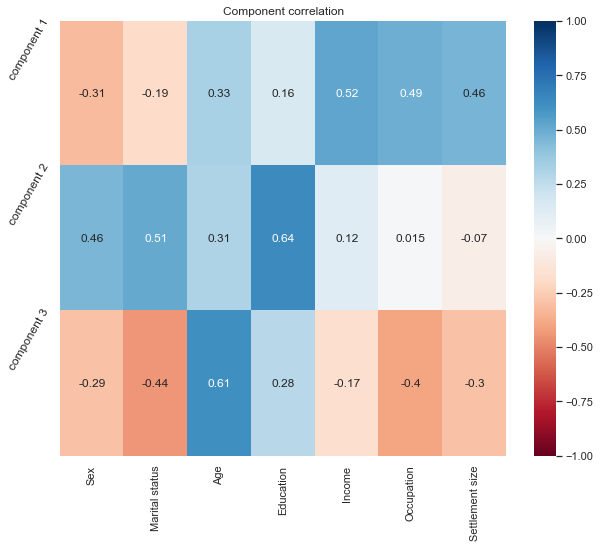

In [37]:
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_comp,
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu')
plt.yticks([0,1,2],
        ['component 1','component 2','component 3'],
          fontsize = 12,
          rotation = 60)
plt.title('Component correlation')

In [38]:
pca_score = pca.transform(segmentation_std)
pca_score

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [39]:
wcss=[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(pca_score)
    wcss.append(kmeans_pca.inertia_)    

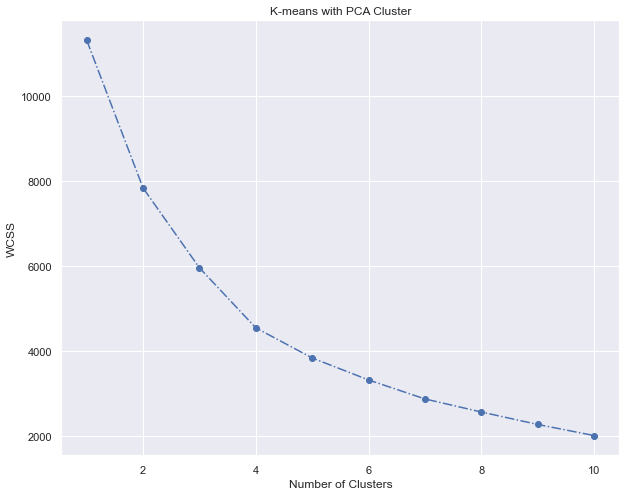

In [40]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Cluster')
plt.show()

In [56]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [57]:
kmeans_pca.fit(pca_score)
kmeans_pca.labels_

array([3, 2, 0, ..., 0, 2, 0])

In [43]:
h = df_segmentation.reset_index(drop = True)
h

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [44]:
df_segm_pca_kmeans = pd.concat([h,pd.DataFrame(pca_score)],axis = 1)
df_segm_pca_kmeans.columns.values[-3:] =  ['Career','Education Lifestyle','Experience']
df_segm_pca_kmeans['Segment k-means pca'] = kmeans_pca.labels_

In [45]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Career,Education Lifestyle,Experience,Segment k-means pca
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [46]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment k-means pca']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Career,Education Lifestyle,Experience
Segment k-means pca,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [47]:
df_segm_pca_kmeans_freq['No of obs'] =df_segm_pca_kmeans[['Segment k-means pca','Sex']].groupby(['Segment k-means pca']).count()
df_segm_pca_kmeans_freq['Prob of obs'] = df_segm_pca_kmeans_freq['No of obs']/df_segm_pca_kmeans_freq['No of obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0: 'Fewer Opportunities',
                                                          1: 'Career Focused',
                                                          2: 'Standard',
                                                          3: 'Well off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Career,Education Lifestyle,Experience,No of obs,Prob of obs
Segment k-means pca,,,,,,,,,,,,
Fewer Opportunities,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
Career Focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
Standard,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
Well off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [48]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment k-means pca'].map({0: 'Fewer Opportunities',
                                                          1: 'Career Focused',
                                                          2: 'Standard',
                                                          3: 'well off'})       

In [49]:
df_segm_pca_kmeans['Segment k-means pca']

0       3
1       2
2       0
3       1
4       1
       ..
1995    0
1996    2
1997    0
1998    2
1999    0
Name: Segment k-means pca, Length: 2000, dtype: int32

In [50]:
df_segm_pca_kmeans['Legend']

0                  well off
1                  Standard
2       Fewer Opportunities
3            Career Focused
4            Career Focused
               ...         
1995    Fewer Opportunities
1996               Standard
1997    Fewer Opportunities
1998               Standard
1999    Fewer Opportunities
Name: Legend, Length: 2000, dtype: object

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


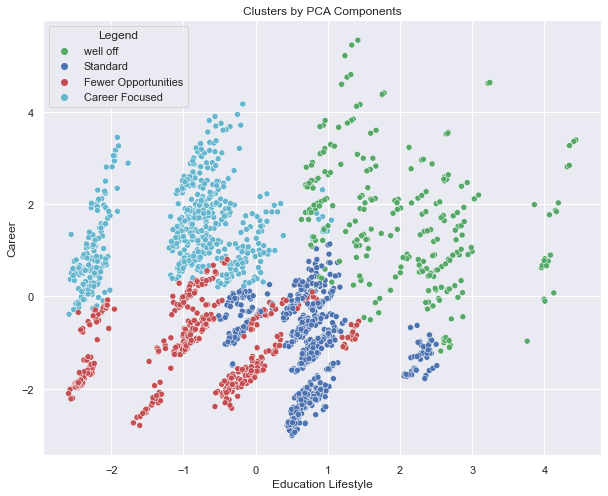

In [51]:
x_axis = df_segm_pca_kmeans['Education Lifestyle']
y_axis = df_segm_pca_kmeans['Career']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','b','r','c'] )
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


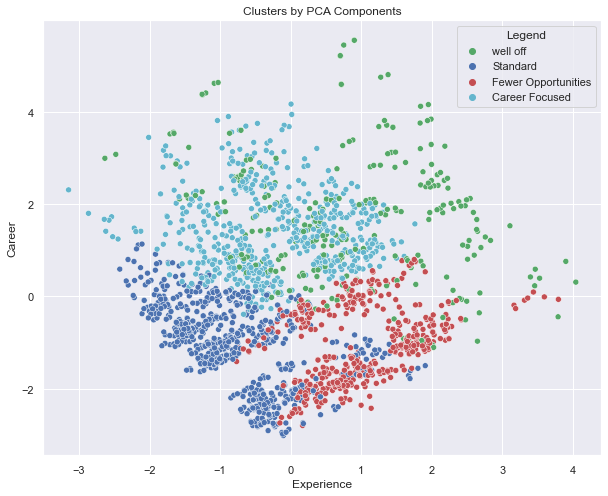

In [52]:
x_axis = df_segm_pca_kmeans['Experience']
y_axis = df_segm_pca_kmeans['Career']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','b','r','c'] )
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


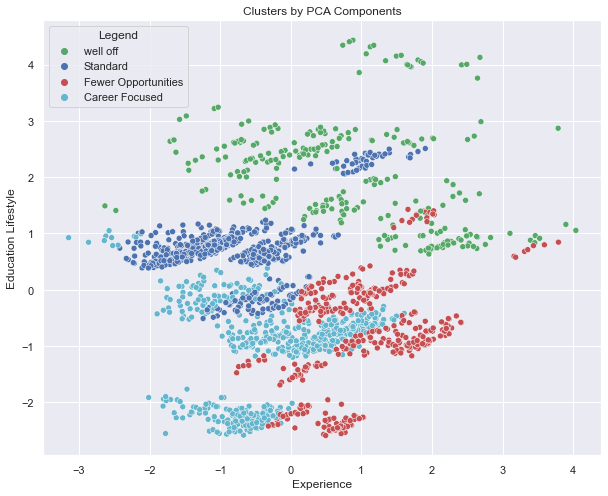

In [53]:
x_axis = df_segm_pca_kmeans['Experience']
y_axis = df_segm_pca_kmeans['Education Lifestyle']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g','b','r','c'] )
plt.title('Clusters by PCA Components')
plt.show()

In [59]:
pickle.dump(scaler,open('scaler.pickle','wb'))


In [60]:
pickle.dump(pca, open('pca.pickle','wb'))


In [62]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))